Neste notebook realizei uma redução de dimensionalidade nos filmes da Netflix usando o método PCA

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [15]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
filmes = df[df['type'] == 'Movie'].copy()

filmes['duration_min'] = filmes['duration'].str.replace('min', '', case=False).str.strip().astype(float)
filmes['num_genres'] = filmes['listed_in'].str.split(',').apply(len)


Nesta célula eu mantive apenas os filmes e converti a duração para minutos, removendo o texto da coluna e também contei quantos gêneros cada filme possui, deixando tudo em formato numérico para poder aplicar o PCA depois.

In [ ]:
dados = filmes[['duration_min', 'release_year', 'num_genres']].dropna()

scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(dados_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])


Aqui selecionei as colunas numéricas que serão usadas no PCA e padronizei os valores com o StandardScaler, entao apliquei o PCA com 2 componentes principais, reduzindo os dados para um espaço 2D que pode ser visualizado em gráfico.

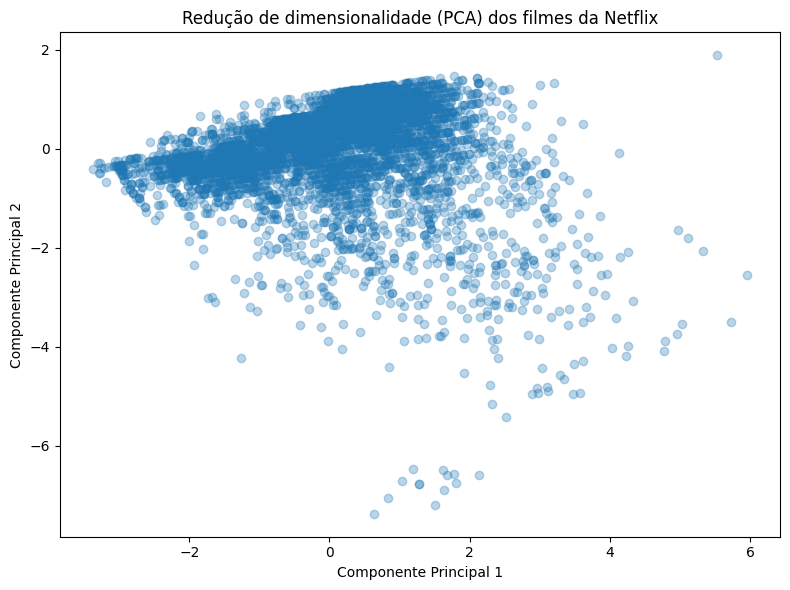

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.3)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Redução de dimensionalidade (PCA) dos filmes da Netflix')
plt.tight_layout()
plt.show()

O gráfico mostra os filmes da Netflix projetados em duas dimensões usando o PCA.
Cada ponto representa um filme, e os eixos são os “componentes principais”, que são combinações matemáticas das variáveis originais (duração, ano e quantidade de gêneros).

Mesmo que os eixos não correspondam a variáveis diretas, o gráfico ajuda a enxergar padrões gerais, pois podemos observar que existe uma grande diversidade de filmes, mas também uma concentração de pontos numa região central, indicando o perfil típico dos filmes da plataforma.
Filmes muito diferentes (muito longos, muito antigos ou com muitos gêneros) aparecem mais afastados dos demais.